In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

In [1]:
dataset = pd.DataFrame({
    'холодно':[1, 0, 0, 1, 0],
    'солнце светит':[0, 0, 1, 1, 0],
    'идти гулять':[0, 1, 1, 1, 1]
})
dataset

,холодно,солнце светит,идти гулять
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1
4,0,0,1


In [7]:
X = dataset.drop('идти гулять', axis=1)
y = dataset['идти гулять']
d_t = tree.DecisionTreeClassifier(random_state=42)
d_t.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [8]:
d_t.get_depth()

2

In [9]:
d_t.get_n_leaves()

np.int64(3)

In [5]:
y_pred = d_t.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


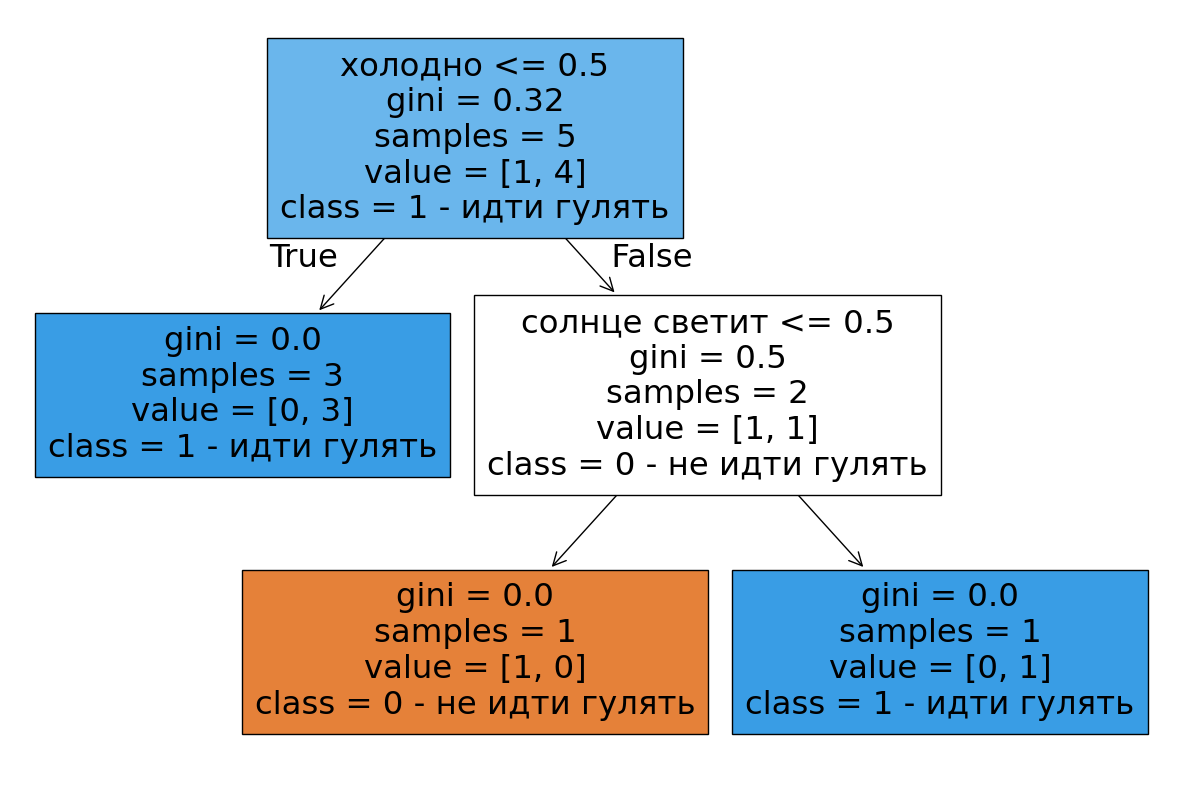

In [10]:
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(
    d_t, # объект обученного дерева
    feature_names=X.columns, # наименования факторов
    class_names=['0 - не идти гулять', '1 - идти гулять'], # имена классов
    filled=True # расцветка графов
);

In [11]:
d_t.feature_importances_

array([0.375, 0.625])

/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_11763/3786263596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=d_t.feature_importances_, ax=ax, palette=colors);
/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_11763/3786263596.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=feature, y=d_t.feature_importances_, ax=ax, palette=colors);


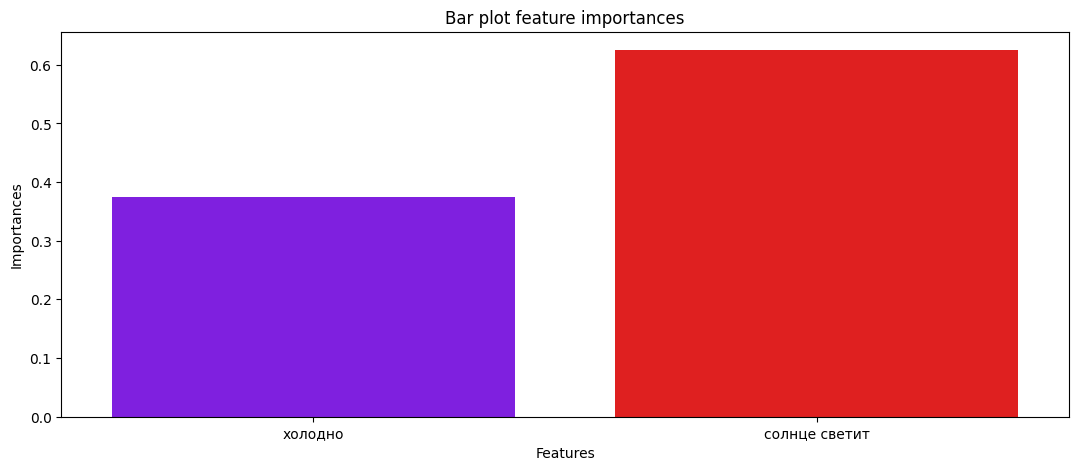

In [12]:
# для удобства и наглядности
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0, 1, len(feature)))
sns.barplot(x=feature, y=d_t.feature_importances_, ax=ax, palette=colors);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [2]:
music = pd.read_csv('/Users/olgazdanova/Downloads/light_music.csv')
music

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.007130,0.013700,0.2440,0.2210,156.909,3,blues
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.080700,0.000000,0.0831,0.2730,113.980,4,blues
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.016200,0.000012,0.1050,0.3900,75.012,4,blues
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.003900,0.118000,0.3370,0.2780,123.596,4,blues
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.649000,0.129000,0.1250,0.4850,95.542,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25,355311,False,0.323,0.997,7,-2.245,1,0.4580,0.012500,0.000004,0.1240,0.1600,176.044,4,spanish
4996,26,494259,False,0.307,0.850,2,-6.056,1,0.1050,0.000677,0.000012,0.7730,0.3860,160.084,4,spanish
4997,26,186786,False,0.545,0.311,0,-12.695,0,0.0303,0.610000,0.000005,0.3850,0.0646,105.063,4,spanish
4998,27,237813,False,0.413,0.688,2,-8.694,1,0.0350,0.021500,0.000201,0.9730,0.2690,104.566,4,spanish


In [3]:
X = music.drop('popularity', axis=1)
y = music['popularity']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       5000 non-null   int64  
 1   explicit          5000 non-null   bool   
 2   danceability      5000 non-null   float64
 3   energy            5000 non-null   float64
 4   key               5000 non-null   int64  
 5   loudness          5000 non-null   float64
 6   mode              5000 non-null   int64  
 7   speechiness       5000 non-null   float64
 8   acousticness      5000 non-null   float64
 9   instrumentalness  5000 non-null   float64
 10  liveness          5000 non-null   float64
 11  valence           5000 non-null   float64
 12  tempo             5000 non-null   float64
 13  time_signature    5000 non-null   int64  
 14  track_genre       5000 non-null   object 
dtypes: bool(1), float64(9), int64(4), object(1)
memory usage: 551.9+ KB


In [5]:
ord_encoder = ce.OrdinalEncoder()
X['track_genre'] = ord_encoder.fit_transform(X[['track_genre']])
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.007130,0.013700,0.2440,0.2210,156.909,3,1
1,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.080700,0.000000,0.0831,0.2730,113.980,4,1
2,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.016200,0.000012,0.1050,0.3900,75.012,4,1
3,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.003900,0.118000,0.3370,0.2780,123.596,4,1
4,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.649000,0.129000,0.1250,0.4850,95.542,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,355311,False,0.323,0.997,7,-2.245,1,0.4580,0.012500,0.000004,0.1240,0.1600,176.044,4,5
4996,494259,False,0.307,0.850,2,-6.056,1,0.1050,0.000677,0.000012,0.7730,0.3860,160.084,4,5
4997,186786,False,0.545,0.311,0,-12.695,0,0.0303,0.610000,0.000005,0.3850,0.0646,105.063,4,5
4998,237813,False,0.413,0.688,2,-8.694,1,0.0350,0.021500,0.000201,0.9730,0.2690,104.566,4,5


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 15) (4000,) (1000, 15) (1000,)


In [15]:
dectree = tree.DecisionTreeRegressor(random_state=1)
dectree.fit(X_train, y_train)
y_pred_train = dectree.predict(X_train)
y_pred_test = dectree.predict(X_test)
print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

20.26219201619459
899.3786557955538


In [8]:
dec_tree = tree.DecisionTreeClassifier(random_state=1)
dec_tree.fit(X_train, y_train)
y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test)
print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))


33.636
972.468


In [33]:
dec_t2 = tree.DecisionTreeRegressor(random_state=1)
    
param_grid = {'max_depth': list(range(1, 26))}

grid_search = GridSearchCV(dec_t2, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
print(grid_search.best_params_)
print(metrics.mean_squared_error(y_test, y_pred_test)) # вот это написала в ответ - неверно

{'max_depth': 5}
732.2296695868393


In [14]:
dec_t = tree.DecisionTreeClassifier(random_state=1)
    
param_grid = {'max_depth': list(range(1, 21))}

grid_search = GridSearchCV(dec_t, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
print(grid_search.best_params_)
print(metrics.mean_squared_error(y_test, y_pred_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 3}
1919.206


In [17]:
music['popularity'] = music['popularity'].apply(lambda x: 1 if x > 50 else 0)

In [19]:
x = music.drop('popularity', axis=1)
y = music['popularity']
x_train, x_test, y_train_bin, y_test_bin = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
y_test_bin.value_counts()

popularity
0    599
1    401
Name: count, dtype: int64

In [45]:
dect = tree.DecisionTreeClassifier(random_state=1)
    
param_grid = {'max_depth': list(range(1, 26))}

grid_search = GridSearchCV(dect, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train_bin)
y_pred_test = grid_search.predict(X_test)
print(grid_search.best_params_)
print(metrics.accuracy_score(y_test_bin, y_pred_test)) #неверно

{'max_depth': 19}
0.695


In [44]:
dect = tree.DecisionTreeClassifier(max_depth=19, random_state=1)
dect.fit(X_train, y_train_bin)
y_pred = dect.predict(X_test)
print(metrics.accuracy_score(y_test_bin, y_pred))

0.695


In [39]:
dect.feature_importances_

array([0.09383234, 0.01213024, 0.06669122, 0.07891498, 0.04285021,
       0.0979297 , 0.00689831, 0.08420272, 0.09305116, 0.06478823,
       0.0737335 , 0.10799762, 0.07324475, 0.01159311, 0.09214191])

/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_12307/1052513294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=dect.feature_importances_, ax=ax, palette=colors);
/var/folders/50/18ts1bh12532xjz2xv95cl540000gn/T/ipykernel_12307/1052513294.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=feature, y=dect.feature_importances_, ax=ax, palette=colors);


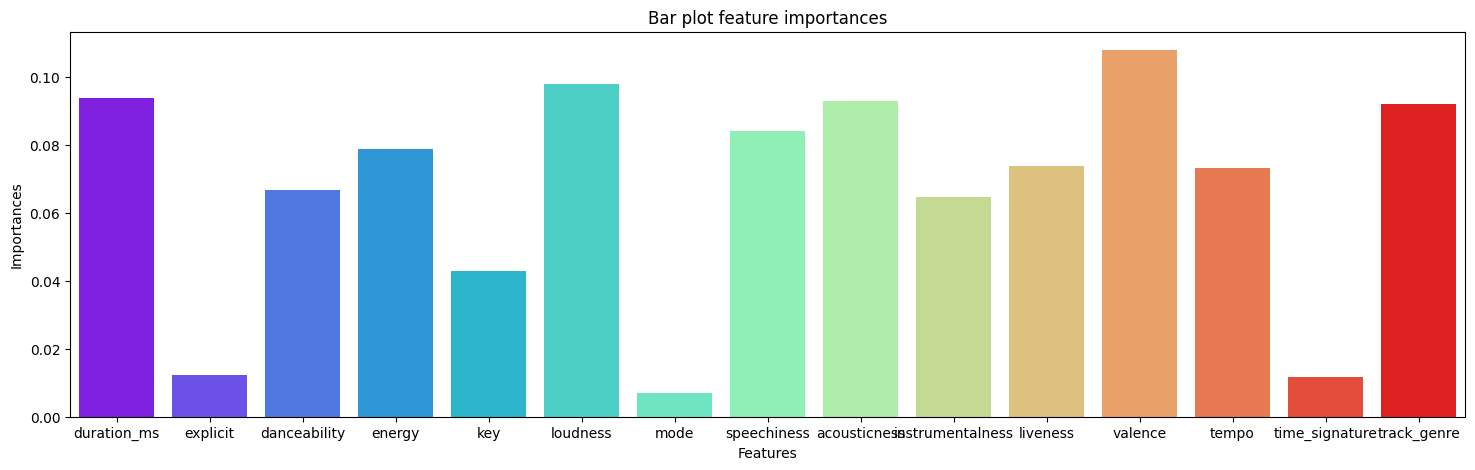

In [41]:
# для удобства и наглядности
fig, ax = plt.subplots(figsize=(18, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0, 1, len(feature)))
sns.barplot(x=feature, y=dect.feature_importances_, ax=ax, palette=colors);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');